In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, load_rebalanced_dataset
from functions.model_running import get_run_number, run_model
from models.xception import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'xception_dealing_with_imbalance_2_oversampling_only'

In [3]:
BATCH_SIZE = 64
unbalanced_dataset = load_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)
balanced_train_dataset = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)

Found 8015 files belonging to 7 classes.
Found 8015 files belonging to 7 classes.


In [4]:
all_labels = []

for images, labels in balanced_train_dataset.take(100):
    all_labels.append(labels.numpy())

all_labels = np.concatenate(all_labels)
class_counts = np.sum(all_labels, axis=0)

In [5]:
mean_class_count = np.mean(class_counts)
resampled_steps_per_epoch = np.ceil(2.0 * mean_class_count / BATCH_SIZE)

In [6]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
28/28 [==============================] - ETA: 0s - loss: 3.8023 - cross entropy: 3.8023 - Brier score: 0.0788 - tp: 756.0000 - fp: 179.0000 - tn: 10279.0000 - fn: 987.0000 - accuracy: 0.9044 - precision: 0.8086 - recall: 0.4337 - auc: 0.8713 - prc: 0.6354

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_1\assets


28/28 [==============================] - 85s 1s/step - loss: 3.8023 - cross entropy: 3.8023 - Brier score: 0.0788 - tp: 756.0000 - fp: 179.0000 - tn: 10279.0000 - fn: 987.0000 - accuracy: 0.9044 - precision: 0.8086 - recall: 0.4337 - auc: 0.8713 - prc: 0.6354 - val_loss: 8.6254 - val_cross entropy: 8.6254 - val_Brier score: 0.0941 - val_tp: 1341.0000 - val_fp: 659.0000 - val_tn: 11341.0000 - val_fn: 659.0000 - val_accuracy: 0.9059 - val_precision: 0.6705 - val_recall: 0.6705 - val_auc: 0.8078 - val_prc: 0.5334 - lr: 0.0010
Epoch 2/100
28/28 [==============================] - ETA: 0s - loss: 0.9960 - cross entropy: 0.9960 - Brier score: 0.0626 - tp: 1001.0000 - fp: 180.0000 - tn: 10572.0000 - fn: 791.0000 - accuracy: 0.9226 - precision: 0.8476 - recall: 0.5586 - auc: 0.9155 - prc: 0.7549

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_2\assets


28/28 [==============================] - 27s 992ms/step - loss: 0.9960 - cross entropy: 0.9960 - Brier score: 0.0626 - tp: 1001.0000 - fp: 180.0000 - tn: 10572.0000 - fn: 791.0000 - accuracy: 0.9226 - precision: 0.8476 - recall: 0.5586 - auc: 0.9155 - prc: 0.7549 - val_loss: 4.3855 - val_cross entropy: 4.3855 - val_Brier score: 0.0915 - val_tp: 1341.0000 - val_fp: 650.0000 - val_tn: 11350.0000 - val_fn: 659.0000 - val_accuracy: 0.9065 - val_precision: 0.6735 - val_recall: 0.6705 - val_auc: 0.8270 - val_prc: 0.5735 - lr: 0.0010
Epoch 3/100
28/28 [==============================] - ETA: 0s - loss: 0.9828 - cross entropy: 0.9828 - Brier score: 0.0624 - tp: 973.0000 - fp: 181.0000 - tn: 10277.0000 - fn: 770.0000 - accuracy: 0.9221 - precision: 0.8432 - recall: 0.5582 - auc: 0.9177 - prc: 0.7455

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_3\assets


28/28 [==============================] - 28s 1s/step - loss: 0.9828 - cross entropy: 0.9828 - Brier score: 0.0624 - tp: 973.0000 - fp: 181.0000 - tn: 10277.0000 - fn: 770.0000 - accuracy: 0.9221 - precision: 0.8432 - recall: 0.5582 - auc: 0.9177 - prc: 0.7455 - val_loss: 2.1562 - val_cross entropy: 2.1562 - val_Brier score: 0.0714 - val_tp: 1304.0000 - val_fp: 443.0000 - val_tn: 11557.0000 - val_fn: 696.0000 - val_accuracy: 0.9186 - val_precision: 0.7464 - val_recall: 0.6520 - val_auc: 0.8857 - val_prc: 0.7117 - lr: 0.0010
Epoch 4/100
28/28 [==============================] - ETA: 0s - loss: 0.8890 - cross entropy: 0.8890 - Brier score: 0.0584 - tp: 1042.0000 - fp: 186.0000 - tn: 10566.0000 - fn: 750.0000 - accuracy: 0.9254 - precision: 0.8485 - recall: 0.5815 - auc: 0.9322 - prc: 0.7876

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_4\assets


28/28 [==============================] - 28s 1s/step - loss: 0.8890 - cross entropy: 0.8890 - Brier score: 0.0584 - tp: 1042.0000 - fp: 186.0000 - tn: 10566.0000 - fn: 750.0000 - accuracy: 0.9254 - precision: 0.8485 - recall: 0.5815 - auc: 0.9322 - prc: 0.7876 - val_loss: 1.6204 - val_cross entropy: 1.6204 - val_Brier score: 0.0679 - val_tp: 1322.0000 - val_fp: 445.0000 - val_tn: 11555.0000 - val_fn: 678.0000 - val_accuracy: 0.9198 - val_precision: 0.7482 - val_recall: 0.6610 - val_auc: 0.9061 - val_prc: 0.7400 - lr: 0.0010
Epoch 5/100
28/28 [==============================] - ETA: 0s - loss: 0.8783 - cross entropy: 0.8783 - Brier score: 0.0589 - tp: 1039.0000 - fp: 182.0000 - tn: 10570.0000 - fn: 753.0000 - accuracy: 0.9255 - precision: 0.8509 - recall: 0.5798 - auc: 0.9331 - prc: 0.7841

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_5\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_5\assets


28/28 [==============================] - 26s 955ms/step - loss: 0.8783 - cross entropy: 0.8783 - Brier score: 0.0589 - tp: 1039.0000 - fp: 182.0000 - tn: 10570.0000 - fn: 753.0000 - accuracy: 0.9255 - precision: 0.8509 - recall: 0.5798 - auc: 0.9331 - prc: 0.7841 - val_loss: 1.1250 - val_cross entropy: 1.1250 - val_Brier score: 0.0617 - val_tp: 1303.0000 - val_fp: 361.0000 - val_tn: 11639.0000 - val_fn: 697.0000 - val_accuracy: 0.9244 - val_precision: 0.7831 - val_recall: 0.6515 - val_auc: 0.9283 - val_prc: 0.7847 - lr: 0.0010
Epoch 6/100
28/28 [==============================] - ETA: 0s - loss: 0.8557 - cross entropy: 0.8557 - Brier score: 0.0567 - tp: 1046.0000 - fp: 174.0000 - tn: 10284.0000 - fn: 697.0000 - accuracy: 0.9286 - precision: 0.8574 - recall: 0.6001 - auc: 0.9362 - prc: 0.7971

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_6\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_6\assets


28/28 [==============================] - 25s 894ms/step - loss: 0.8557 - cross entropy: 0.8557 - Brier score: 0.0567 - tp: 1046.0000 - fp: 174.0000 - tn: 10284.0000 - fn: 697.0000 - accuracy: 0.9286 - precision: 0.8574 - recall: 0.6001 - auc: 0.9362 - prc: 0.7971 - val_loss: 0.9120 - val_cross entropy: 0.9120 - val_Brier score: 0.0545 - val_tp: 1266.0000 - val_fp: 234.0000 - val_tn: 11766.0000 - val_fn: 734.0000 - val_accuracy: 0.9309 - val_precision: 0.8440 - val_recall: 0.6330 - val_auc: 0.9413 - val_prc: 0.8101 - lr: 0.0010
Epoch 7/100
28/28 [==============================] - 9s 333ms/step - loss: 0.8317 - cross entropy: 0.8317 - Brier score: 0.0567 - tp: 1046.0000 - fp: 175.0000 - tn: 10577.0000 - fn: 746.0000 - accuracy: 0.9266 - precision: 0.8567 - recall: 0.5837 - auc: 0.9412 - prc: 0.8015 - val_loss: 1.0817 - val_cross entropy: 1.0817 - val_Brier score: 0.0536 - val_tp: 1194.0000 - val_fp: 158.0000 - val_tn: 11842.0000 - val_fn: 806.0000 - val_accuracy: 0.9311 - val_precision: 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_9\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_9\assets


28/28 [==============================] - 30s 1s/step - loss: 0.7956 - cross entropy: 0.7956 - Brier score: 0.0537 - tp: 1092.0000 - fp: 171.0000 - tn: 10581.0000 - fn: 700.0000 - accuracy: 0.9306 - precision: 0.8646 - recall: 0.6094 - auc: 0.9462 - prc: 0.8191 - val_loss: 0.8517 - val_cross entropy: 0.8517 - val_Brier score: 0.0532 - val_tp: 1303.0000 - val_fp: 261.0000 - val_tn: 11739.0000 - val_fn: 697.0000 - val_accuracy: 0.9316 - val_precision: 0.8331 - val_recall: 0.6515 - val_auc: 0.9483 - val_prc: 0.8245 - lr: 0.0010
Epoch 10/100
28/28 [==============================] - ETA: 0s - loss: 0.7600 - cross entropy: 0.7600 - Brier score: 0.0527 - tp: 1122.0000 - fp: 204.0000 - tn: 10548.0000 - fn: 670.0000 - accuracy: 0.9303 - precision: 0.8462 - recall: 0.6261 - auc: 0.9511 - prc: 0.8259

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_10\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_10\assets


28/28 [==============================] - 25s 902ms/step - loss: 0.7600 - cross entropy: 0.7600 - Brier score: 0.0527 - tp: 1122.0000 - fp: 204.0000 - tn: 10548.0000 - fn: 670.0000 - accuracy: 0.9303 - precision: 0.8462 - recall: 0.6261 - auc: 0.9511 - prc: 0.8259 - val_loss: 0.7783 - val_cross entropy: 0.7783 - val_Brier score: 0.0517 - val_tp: 1194.0000 - val_fp: 123.0000 - val_tn: 11877.0000 - val_fn: 806.0000 - val_accuracy: 0.9336 - val_precision: 0.9066 - val_recall: 0.5970 - val_auc: 0.9513 - val_prc: 0.8304 - lr: 0.0010
Epoch 11/100
28/28 [==============================] - 9s 334ms/step - loss: 0.7329 - cross entropy: 0.7329 - Brier score: 0.0509 - tp: 1167.0000 - fp: 223.0000 - tn: 10529.0000 - fn: 625.0000 - accuracy: 0.9324 - precision: 0.8396 - recall: 0.6512 - auc: 0.9558 - prc: 0.8339 - val_loss: 1.1189 - val_cross entropy: 1.1189 - val_Brier score: 0.0535 - val_tp: 1373.0000 - val_fp: 322.0000 - val_tn: 11678.0000 - val_fn: 627.0000 - val_accuracy: 0.9322 - val_precision:

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_16\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_16\assets


28/28 [==============================] - 31s 1s/step - loss: 0.6431 - cross entropy: 0.6431 - Brier score: 0.0448 - tp: 1257.0000 - fp: 216.0000 - tn: 10536.0000 - fn: 535.0000 - accuracy: 0.9401 - precision: 0.8534 - recall: 0.7015 - auc: 0.9647 - prc: 0.8696 - val_loss: 0.6623 - val_cross entropy: 0.6623 - val_Brier score: 0.0455 - val_tp: 1425.0000 - val_fp: 269.0000 - val_tn: 11731.0000 - val_fn: 575.0000 - val_accuracy: 0.9397 - val_precision: 0.8412 - val_recall: 0.7125 - val_auc: 0.9628 - val_prc: 0.8625 - lr: 0.0010
Epoch 17/100
28/28 [==============================] - 10s 335ms/step - loss: 0.6281 - cross entropy: 0.6281 - Brier score: 0.0414 - tp: 1328.0000 - fp: 211.0000 - tn: 10541.0000 - fn: 464.0000 - accuracy: 0.9462 - precision: 0.8629 - recall: 0.7411 - auc: 0.9680 - prc: 0.8835 - val_loss: 0.7215 - val_cross entropy: 0.7215 - val_Brier score: 0.0477 - val_tp: 1379.0000 - val_fp: 274.0000 - val_tn: 11726.0000 - val_fn: 621.0000 - val_accuracy: 0.9361 - val_precision: 0

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_26\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_26\assets


28/28 [==============================] - 32s 1s/step - loss: 0.5962 - cross entropy: 0.5962 - Brier score: 0.0423 - tp: 1321.0000 - fp: 224.0000 - tn: 10528.0000 - fn: 471.0000 - accuracy: 0.9446 - precision: 0.8550 - recall: 0.7372 - auc: 0.9695 - prc: 0.8786 - val_loss: 0.6611 - val_cross entropy: 0.6611 - val_Brier score: 0.0455 - val_tp: 1361.0000 - val_fp: 202.0000 - val_tn: 11798.0000 - val_fn: 639.0000 - val_accuracy: 0.9399 - val_precision: 0.8708 - val_recall: 0.6805 - val_auc: 0.9631 - val_prc: 0.8587 - lr: 0.0010
Epoch 27/100
28/28 [==============================] - 10s 336ms/step - loss: 0.5805 - cross entropy: 0.5805 - Brier score: 0.0412 - tp: 1315.0000 - fp: 224.0000 - tn: 10528.0000 - fn: 477.0000 - accuracy: 0.9441 - precision: 0.8545 - recall: 0.7338 - auc: 0.9708 - prc: 0.8877 - val_loss: 0.7105 - val_cross entropy: 0.7105 - val_Brier score: 0.0489 - val_tp: 1416.0000 - val_fp: 294.0000 - val_tn: 11706.0000 - val_fn: 584.0000 - val_accuracy: 0.9373 - val_precision: 0

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_28\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_28\assets


28/28 [==============================] - 26s 966ms/step - loss: 0.5470 - cross entropy: 0.5470 - Brier score: 0.0399 - tp: 1325.0000 - fp: 218.0000 - tn: 10534.0000 - fn: 467.0000 - accuracy: 0.9454 - precision: 0.8587 - recall: 0.7394 - auc: 0.9741 - prc: 0.8957 - val_loss: 0.6244 - val_cross entropy: 0.6244 - val_Brier score: 0.0426 - val_tp: 1485.0000 - val_fp: 298.0000 - val_tn: 11702.0000 - val_fn: 515.0000 - val_accuracy: 0.9419 - val_precision: 0.8329 - val_recall: 0.7425 - val_auc: 0.9666 - val_prc: 0.8793 - lr: 0.0010
Epoch 29/100
28/28 [==============================] - 10s 333ms/step - loss: 0.5482 - cross entropy: 0.5482 - Brier score: 0.0395 - tp: 1332.0000 - fp: 206.0000 - tn: 10546.0000 - fn: 460.0000 - accuracy: 0.9469 - precision: 0.8661 - recall: 0.7433 - auc: 0.9735 - prc: 0.8963 - val_loss: 0.6896 - val_cross entropy: 0.6896 - val_Brier score: 0.0481 - val_tp: 1484.0000 - val_fp: 374.0000 - val_tn: 11626.0000 - val_fn: 516.0000 - val_accuracy: 0.9364 - val_precision

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_31\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_31\assets


28/28 [==============================] - 26s 960ms/step - loss: 0.5166 - cross entropy: 0.5166 - Brier score: 0.0375 - tp: 1392.0000 - fp: 219.0000 - tn: 10533.0000 - fn: 400.0000 - accuracy: 0.9507 - precision: 0.8641 - recall: 0.7768 - auc: 0.9768 - prc: 0.9039 - val_loss: 0.5714 - val_cross entropy: 0.5714 - val_Brier score: 0.0407 - val_tp: 1520.0000 - val_fp: 286.0000 - val_tn: 11714.0000 - val_fn: 480.0000 - val_accuracy: 0.9453 - val_precision: 0.8416 - val_recall: 0.7600 - val_auc: 0.9723 - val_prc: 0.8905 - lr: 0.0010
Epoch 32/100
28/28 [==============================] - 9s 327ms/step - loss: 0.5078 - cross entropy: 0.5078 - Brier score: 0.0370 - tp: 1346.0000 - fp: 210.0000 - tn: 10248.0000 - fn: 397.0000 - accuracy: 0.9502 - precision: 0.8650 - recall: 0.7722 - auc: 0.9780 - prc: 0.9080 - val_loss: 0.6200 - val_cross entropy: 0.6200 - val_Brier score: 0.0439 - val_tp: 1502.0000 - val_fp: 316.0000 - val_tn: 11684.0000 - val_fn: 498.0000 - val_accuracy: 0.9419 - val_precision:

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_36\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_36\assets


28/28 [==============================] - 27s 976ms/step - loss: 0.5089 - cross entropy: 0.5089 - Brier score: 0.0379 - tp: 1345.0000 - fp: 205.0000 - tn: 10547.0000 - fn: 447.0000 - accuracy: 0.9480 - precision: 0.8677 - recall: 0.7506 - auc: 0.9776 - prc: 0.9044 - val_loss: 0.5691 - val_cross entropy: 0.5691 - val_Brier score: 0.0405 - val_tp: 1537.0000 - val_fp: 305.0000 - val_tn: 11695.0000 - val_fn: 463.0000 - val_accuracy: 0.9451 - val_precision: 0.8344 - val_recall: 0.7685 - val_auc: 0.9722 - val_prc: 0.8919 - lr: 0.0010
Epoch 37/100
28/28 [==============================] - 10s 334ms/step - loss: 0.5165 - cross entropy: 0.5165 - Brier score: 0.0367 - tp: 1370.0000 - fp: 202.0000 - tn: 10550.0000 - fn: 422.0000 - accuracy: 0.9503 - precision: 0.8715 - recall: 0.7645 - auc: 0.9766 - prc: 0.9065 - val_loss: 0.6308 - val_cross entropy: 0.6308 - val_Brier score: 0.0440 - val_tp: 1513.0000 - val_fp: 359.0000 - val_tn: 11641.0000 - val_fn: 487.0000 - val_accuracy: 0.9396 - val_precision

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_43\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_43\assets


28/28 [==============================] - 38s 1s/step - loss: 0.4313 - cross entropy: 0.4313 - Brier score: 0.0316 - tp: 1454.0000 - fp: 203.0000 - tn: 10549.0000 - fn: 338.0000 - accuracy: 0.9569 - precision: 0.8775 - recall: 0.8114 - auc: 0.9835 - prc: 0.9289 - val_loss: 0.5278 - val_cross entropy: 0.5278 - val_Brier score: 0.0381 - val_tp: 1569.0000 - val_fp: 276.0000 - val_tn: 11724.0000 - val_fn: 431.0000 - val_accuracy: 0.9495 - val_precision: 0.8504 - val_recall: 0.7845 - val_auc: 0.9754 - val_prc: 0.9032 - lr: 0.0010
Epoch 44/100
28/28 [==============================] - 10s 335ms/step - loss: 0.4763 - cross entropy: 0.4763 - Brier score: 0.0341 - tp: 1429.0000 - fp: 215.0000 - tn: 10537.0000 - fn: 363.0000 - accuracy: 0.9539 - precision: 0.8692 - recall: 0.7974 - auc: 0.9801 - prc: 0.9160 - val_loss: 0.6521 - val_cross entropy: 0.6521 - val_Brier score: 0.0451 - val_tp: 1530.0000 - val_fp: 354.0000 - val_tn: 11646.0000 - val_fn: 470.0000 - val_accuracy: 0.9411 - val_precision: 0

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_49\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_10_49\assets


28/28 [==============================] - 29s 1s/step - loss: 0.4721 - cross entropy: 0.4721 - Brier score: 0.0345 - tp: 1426.0000 - fp: 215.0000 - tn: 10537.0000 - fn: 366.0000 - accuracy: 0.9537 - precision: 0.8690 - recall: 0.7958 - auc: 0.9804 - prc: 0.9169 - val_loss: 0.5157 - val_cross entropy: 0.5157 - val_Brier score: 0.0369 - val_tp: 1570.0000 - val_fp: 265.0000 - val_tn: 11735.0000 - val_fn: 430.0000 - val_accuracy: 0.9504 - val_precision: 0.8556 - val_recall: 0.7850 - val_auc: 0.9773 - val_prc: 0.9070 - lr: 0.0010
Epoch 50/100
28/28 [==============================] - 10s 334ms/step - loss: 0.4009 - cross entropy: 0.4009 - Brier score: 0.0293 - tp: 1489.0000 - fp: 179.0000 - tn: 10573.0000 - fn: 303.0000 - accuracy: 0.9616 - precision: 0.8927 - recall: 0.8309 - auc: 0.9853 - prc: 0.9360 - val_loss: 0.7356 - val_cross entropy: 0.7356 - val_Brier score: 0.0506 - val_tp: 1489.0000 - val_fp: 418.0000 - val_tn: 11582.0000 - val_fn: 511.0000 - val_accuracy: 0.9336 - val_precision: 0

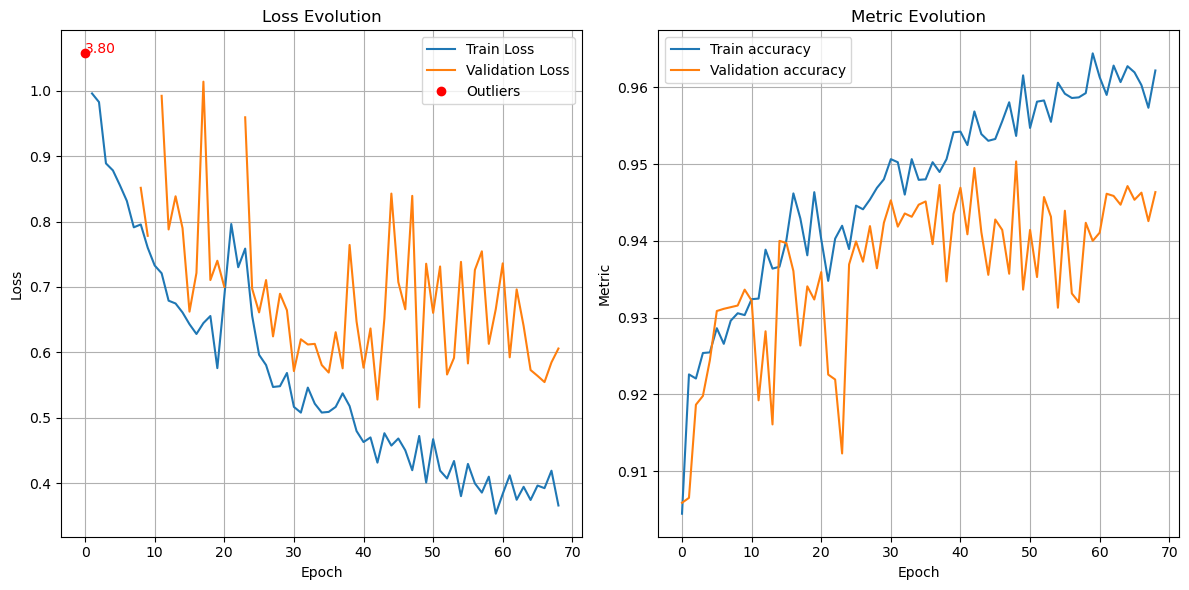

(<keras.engine.functional.Functional at 0x2ae699b2220>,
 <keras.callbacks.History at 0x2ae6998abe0>)

In [7]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
    lambda: get_basic_model(
        HEIGHT,
        WIDTH,
        num_classes,
        metrics=METRICS),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    train_dataset=balanced_train_dataset,
    steps_per_epoch=resampled_steps_per_epoch,
    stopping_patience=20)